# Exploring & Machine Learning for Airbnb Listings in Toronto

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
calendar = pd.read_csv('D:\Study_material\Data_Science\capstone_project\ML_practise\data\calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 366 days and 19575 unique listings in the calendar data.


In [9]:
calendar.date.min(), calendar.date.max()

('2020-08-18', '2021-08-18')

In [10]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    92
maximum_nights    92
dtype: int64

In [11]:
calendar.shape

(7144972, 7)

In [12]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,624190,2020-08-18,f,$450.00,$450.00,1.0,1125.0
1,304065,2020-08-19,f,$73.00,$73.00,2.0,1125.0
2,304065,2020-08-20,t,$73.00,$73.00,2.0,1125.0
3,304065,2020-08-21,t,$73.00,$73.00,2.0,1125.0
4,304065,2020-08-22,t,$73.00,$73.00,2.0,1125.0


In [13]:
calendar.available.value_counts()

f    4748244
t    2396728
Name: available, dtype: int64

In [14]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

<ipython-input-14-25c4afdfce4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)


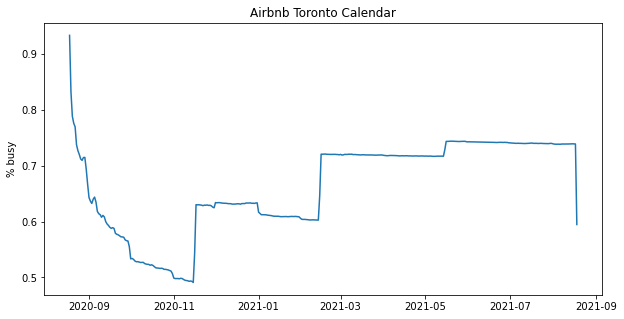

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

In [16]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,624190,2020-08-18,f,$450.00,$450.00,1.0,1125.0
1,304065,2020-08-19,f,$73.00,$73.00,2.0,1125.0
2,304065,2020-08-20,t,$73.00,$73.00,2.0,1125.0
3,304065,2020-08-21,t,$73.00,$73.00,2.0,1125.0
4,304065,2020-08-22,t,$73.00,$73.00,2.0,1125.0


<ipython-input-18-d29a079fb78b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '')


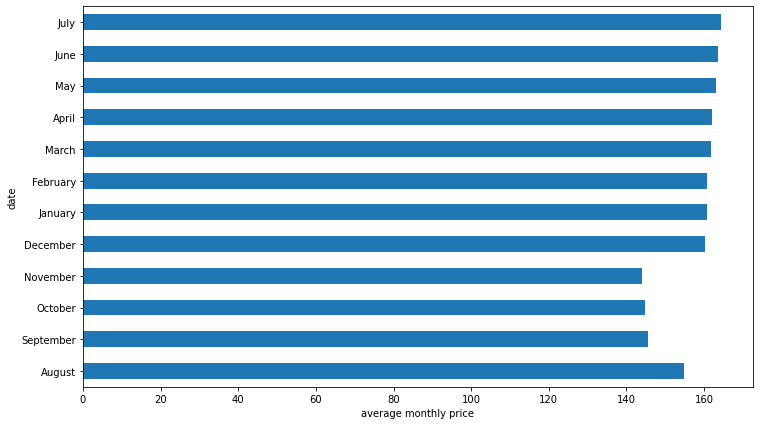

In [18]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');